<a href="https://colab.research.google.com/github/JEN6YT/APS360-Project/blob/main/Image_level_Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image, ImageDraw
import pandas as pd
import os
import torchvision.transforms as transforms
import torch
import random
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get image and label


In [ ]:

# read the xlsx file from Google Drive
file_path = '/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/img_path.xlsx'

# The dataframe store all the path, i.e. 'NIH-NLM-ThinBloodSmearsPf\Polygon Set\142C38P...'
df1 = pd.read_excel(file_path)

# create complete path for each image
prefix = "/content/drive/MyDrive/APS360/"
df1 = df1.applymap(lambda x: prefix + str(x))


'\n# read the xlsx file from Google Drive\nfile_path = \'/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/img_path.xlsx\'\n\n# The dataframe store all the path, i.e. \'NIH-NLM-ThinBloodSmearsPf\\Polygon SetbC38P...\'\ndf1 = pd.read_excel(file_path)\n\n# create complete path for each image\nprefix = "/content/drive/MyDrive/APS360/"\ndf1 = df1.applymap(lambda x: prefix + str(x))\n'

In [ ]:
test_df1.head()

,File path
0,/content/drive/MyDrive/APS360NIH-NLM-ThinBlood...
1,/content/drive/MyDrive/APS360NIH-NLM-ThinBlood...
2,/content/drive/MyDrive/APS360NIH-NLM-ThinBlood...
3,/content/drive/MyDrive/APS360NIH-NLM-ThinBlood...
4,/content/drive/MyDrive/APS360NIH-NLM-ThinBlood...


In [ ]:
df1.shape

(165, 1)

In [ ]:
# read the xlsx file from Google Drive
test_file_path = '/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/test_img_path.xlsx'

# The dataframe store all the path, i.e. 'NIH-NLM-ThinBloodSmearsPf\Polygon Set\142C38P...'
test_df1 = pd.read_excel(test_file_path)

# create complete path for each image
prefix = "/content/drive/MyDrive/APS360/"
test_df1 = test_df1.applymap(lambda x: prefix + str(x))


In [ ]:
# read the xlsx file from Google Drive
file_path_infected = '/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/infected_RBC.xlsx'

# The dataframe store all the path, i.e. 'NIH-NLM-ThinBloodSmearsPf\Polygon Set\142C38P...'
df2 = pd.read_excel(file_path_infected)

In [ ]:
df2.head()

,Infected RBC
0,0
1,2
2,2
3,1
4,0


In [ ]:
df = pd.merge(df1, df2, left_index=True, right_index=True)

loading test data

In [ ]:
# read the xlsx file from Google Drive
test_file_path_infected = '/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/test_infected_RBC.xlsx'

# The dataframe store all the path, i.e. 'NIH-NLM-ThinBloodSmearsPf\Polygon Set\142C38P...'
test_df2 = pd.read_excel(test_file_path_infected)

In [ ]:
test_df = pd.merge(test_df1, test_df2, left_index=True, right_index=True)

In [ ]:
df.head()

,File path,Infected RBC
0,/content/drive/MyDrive/APS360/NIH-NLM-ThinBloo...,39
1,/content/drive/MyDrive/APS360/NIH-NLM-ThinBloo...,27
2,/content/drive/MyDrive/APS360/NIH-NLM-ThinBloo...,42
3,/content/drive/MyDrive/APS360/NIH-NLM-ThinBloo...,37
4,/content/drive/MyDrive/APS360/NIH-NLM-ThinBloo...,45


In [ ]:
test_df.shape

(165, 2)

## Label, resize, save in array

In [ ]:
data_list = []
target_size = (224, 224)

# iterate over rows and label images
for i, row in df.iterrows():
  # get the file path and infected RBC count

  file_path = row['File path']
  infected_rbc = row['Infected RBC']
  
  # open the image using PIL
  image = Image.open(file_path)
  image = image.resize(target_size)
  img_arr = np.array(image)
  
  # label the image based on the infected RBC count
  if infected_rbc == 0:
    label = 0
  elif infected_rbc > 0:
    label = 1
  
  # append the image and label to the list
  data = {'image': img_arr, 'label': label}
  data_list.append(data)

# convert the list to numpy array and save it
np.save('data.npy', np.array(data_list))

For test(below)

In [ ]:
test_data_list = []
target_size = (224, 224)

# iterate over rows and label images
for i, row in test_df.iterrows():
  # get the file path and infected RBC count

  file_path = row['File path']
  infected_rbc = row['Infected RBC']
  
  # open the image using PIL
  image = Image.open(file_path)
  image = image.resize(target_size)
  img_arr = np.array(image)
  
  # label the image based on the infected RBC count
  if infected_rbc == 0:
    label = 0
  elif infected_rbc > 0:
    label = 1
  
  # append the image and label to the list
  data = {'image': img_arr, 'label': label}
  test_data_list.append(data)

# convert the list to numpy array and save it
np.save('test_data.npy', np.array(test_data_list))

In [ ]:
data_list[0]

{'image': array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 2],
         [1, 1, 3],
         [1, 1, 2]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [0, 0, 1],
         [1, 1, 1],
         [1, 1, 2]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [0, 0, 1],
         [1, 1, 1]],
 
        ...,
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [1, 1, 1],
         [1, 0, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [2, 0, 1]]], dtype=uint8), 'label': 1}

# Checking balance

In [ ]:
infected = 0
uninfected = 0
for data in data_list:
  if data['label'] == 1:
    infected += 1
  if data['label'] == 0:
    uninfected += 1
total = infected+uninfected
print(f'infected data {infected/total} and uninfected data {uninfected/total}')

infected data 0.71125 and uninfected data 0.28875


for test

In [ ]:
infected = 0
uninfected = 0
for data in test_data_list:
  if data['label'] == 1:
    infected += 1
  if data['label'] == 0:
    uninfected += 1
total = infected+uninfected
print(f'infected data {infected/total} and uninfected data {uninfected/total}')

infected data 0.6060606060606061 and uninfected data 0.3939393939393939


## Resampling

In [ ]:
# load the data from the saved numpy array
data = np.load('data.npy', allow_pickle=True)

# get the features (images) and labels
image = np.array([d['image'].flatten() for d in data])
label = np.array([d['label'] for d in data])

# reshape X to a 2D array
image = image.reshape(image.shape[0], -1)

# apply RandomOverSampler to X and y
ros = RandomOverSampler()
image_resampled, label_resampled = ros.fit_resample(image, label)

# reshape X_resampled back to 4D array
image_resampled = image_resampled.reshape(image_resampled.shape[0], 224, 224, 3)

# combine X_resampled and y_resampled into a list of dicts
data_resampled = [{'image': image_resampled[i], 'label': label_resampled[i]} for i in range(len(label_resampled))]

# save the resampled data to a new numpy array
np.save('data_resampled.npy', np.array(data_resampled))

In [ ]:
infected = 0
uninfected = 0
for data in data_resampled:
  if data['label'] == 1:
    infected += 1
  if data['label'] == 0:
    uninfected += 1
total = infected+uninfected
print(f'infected data {infected/total} and uninfected data {uninfected/total}')

infected data 0.5 and uninfected data 0.5


In [ ]:
total

1138

for test

In [ ]:
# load the data from the saved numpy array
data = np.load('test_data.npy', allow_pickle=True)

# get the features (images) and labels
image = np.array([d['image'].flatten() for d in data])
label = np.array([d['label'] for d in data])

# reshape X to a 2D array
image = image.reshape(image.shape[0], -1)

# apply RandomOverSampler to X and y
ros = RandomOverSampler()
image_resampled, label_resampled = ros.fit_resample(image, label)

# reshape X_resampled back to 4D array
image_resampled = image_resampled.reshape(image_resampled.shape[0], 224, 224, 3)

# combine X_resampled and y_resampled into a list of dicts
test_data_resampled = [{'image': image_resampled[i], 'label': label_resampled[i]} for i in range(len(label_resampled))]

# save the resampled data to a new numpy array
np.save('test_data_resampled.npy', np.array(test_data_resampled))

In [ ]:
infected = 0
uninfected = 0
for data in test_data_resampled:
  if data['label'] == 1:
    infected += 1
  if data['label'] == 0:
    uninfected += 1
total = infected+uninfected
print(f'infected data {infected/total} and uninfected data {uninfected/total}')

infected data 0.5 and uninfected data 0.5


# Normalizing

In [ ]:
# Define the normalization function
def normalize(image):
  return (image - np.min(image)) / (np.max(image) - np.min(image))

# Normalize the data
normalized_data = []
for data in data_resampled:
  normalized_image = normalize(data['image'])
  normalized_data.append({'image': normalized_image, 'label': data['label']})

# Save the normalized data as a .npy file
np.save('normalized_data.npy', normalized_data)

In [ ]:
len(normalized_data)

1138

for test


In [ ]:
# Define the normalization function
def normalize(image):
  return (image - np.min(image)) / (np.max(image) - np.min(image))

# Normalize the data
test_normalized_data = []
for data in test_data_resampled:
  normalized_image = normalize(data['image'])
  test_normalized_data.append({'image': normalized_image, 'label': data['label']})

# Save the normalized data as a .npy file
np.save('test_normalized_data.npy', test_normalized_data)

In [ ]:
len(test_normalized_data)

200

Save test data

In [ ]:
# get the features (images) and labels
X_test = np.array([d['image'] for d in test_normalized_data])
y_test = np.array([d['label'] for d in test_normalized_data])


np.save('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_test_data.npy', X_test)

# Save y_train
np.save('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_test_data.npy', y_test)

# Splitting

In [ ]:
# get the features (images) and labels
X = np.array([d['image'] for d in normalized_data])
y = np.array([d['label'] for d in normalized_data])

# Split your data into training, validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=66)

In [ ]:
print(len(X_train),len(X_val))

796 342


In [ ]:
X_train

array([[[[0.00425532, 0.00425532, 0.00851064],
         [0.        , 0.        , 0.        ],
         [0.00425532, 0.00425532, 0.00425532],
         ...,
         [0.00425532, 0.00425532, 0.00851064],
         [0.        , 0.        , 0.00851064],
         [0.00425532, 0.00425532, 0.00425532]],

        [[0.00425532, 0.00425532, 0.00425532],
         [0.00425532, 0.00425532, 0.00425532],
         [0.00425532, 0.00425532, 0.00425532],
         ...,
         [0.00425532, 0.00425532, 0.00851064],
         [0.        , 0.        , 0.00425532],
         [0.00425532, 0.00425532, 0.00425532]],

        [[0.00425532, 0.00425532, 0.00425532],
         [0.00425532, 0.00425532, 0.00425532],
         [0.00425532, 0.00425532, 0.00425532],
         ...,
         [0.00425532, 0.00425532, 0.00851064],
         [0.00425532, 0.00425532, 0.00851064],
         [0.00425532, 0.00425532, 0.00425532]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.00425532, 0.00425532, 0.00425532]

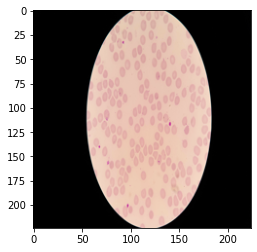

1


In [ ]:
import matplotlib.pyplot as plt

# Access the first image in the training set
image = X_train[0]
label = y_train[0]

# Visualize the image
plt.imshow(image)

# Show the plot
plt.show()
print(label)

# Augmentation

In [ ]:
# create an ImageDataGenerator instance with desired data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=25,
    horizontal_flip=True
)

# compute internal statistics of the data
datagen.fit(X_train)

# generate augmented data in batches
augmented_data_generator = datagen.flow(X_train, y_train, batch_size=32)

# iterate over batches of augmented data and add them to the original dataset
for x_batch, y_batch in augmented_data_generator:
  X_train = np.concatenate([X_train, x_batch], axis=0)
  y_train = np.concatenate([y_train, y_batch], axis=0)
  
  # break the loop if we have reached the desired number of samples
  if len(X_train) >= 1348:
      break

In [ ]:
len(X_train)

1372

In [ ]:
y_train

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
len(y_train)

1372

In [ ]:
# set the random seed for reproducibility
np.random.seed(66)

# create an array of indices for shuffling
indices = np.arange(len(X_train))

# shuffle the indices
np.random.shuffle(indices)

# shuffle the x_train and y_train arrays using the shuffled indices
X_train = X_train[indices]
y_train = y_train[indices]

In [ ]:
# Save x_train
np.save('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_train_data.npy', X_train)

# Save y_train
np.save('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_train_data.npy', y_train)

# Save x_val
np.save('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_val_data.npy', X_val)

# Save y_val
np.save('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_val_data.npy', y_val)

In [ ]:
X_train = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/x_train_data.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/APS360/NIH-NLM-ThinBloodSmearsPf/y_train_data.npy', allow_pickle=True)

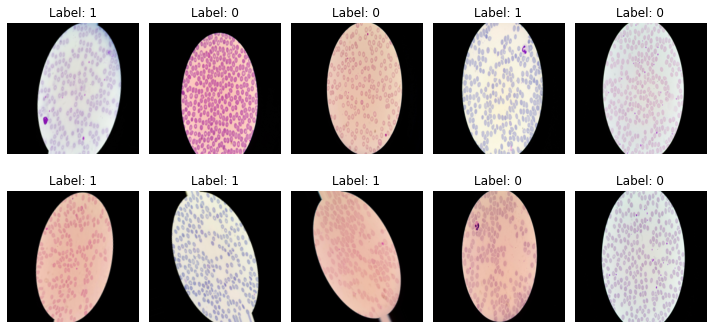

In [ ]:
import matplotlib.pyplot as plt

images = X_train[15:25]
labels = y_train[15:25]

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Iterate over the images and labels in the batch and plot them in the subplots
for i, (image, label) in enumerate(zip(images, labels)):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    ax.imshow(image)
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import torch
X_train  = torch.from_numpy(X_train)